In [1]:
#installation of datatset
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Skipping, found downloaded files in ".\sms-spam-collection-dataset" (use force=True to force download)


In [4]:
data='./sms-spam-collection-dataset'

In [5]:
import os
os.listdir(data)

['.ipynb_checkpoints']

In [7]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings("ignore")

In [9]:
#exploratory analysis of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
data.shape

(5572, 5)

In [12]:
#dropping the unnecessary columns
data=data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#renaming the columns as text and target 
data=data.rename({'v1':'target','v2':'text'}, axis=1)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#converting the target column to numerical values by using labelEncoder
encoder=LabelEncoder()
data["target"] = encoder.fit_transform(data["target"])

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.isnull().sum()

target    0
text      0
dtype: int64

<Axes: >

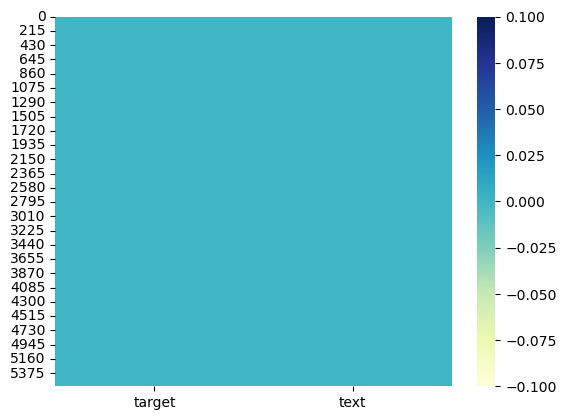

In [19]:
sns.heatmap(data.isnull(), cmap='YlGnBu')

In [20]:
data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

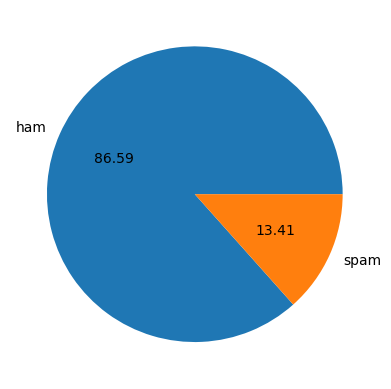

In [21]:
plt.pie(data['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [22]:
#Obtaining the word count, number of words, number of sentences
data['len']=data['text'].apply(len)
data['words']= data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['sentences']= data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data.head()

,target,text,len,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
data.describe()

,target,len,words,sentences
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
#descriptive statistics if ham
data[data['target']==0].describe()

,target,len,words,sentences
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
#descriptive statistics if spam
data[data['target']==1].describe()

,target,len,words,sentences
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.021419
std,0.0,29.183082,6.867007,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


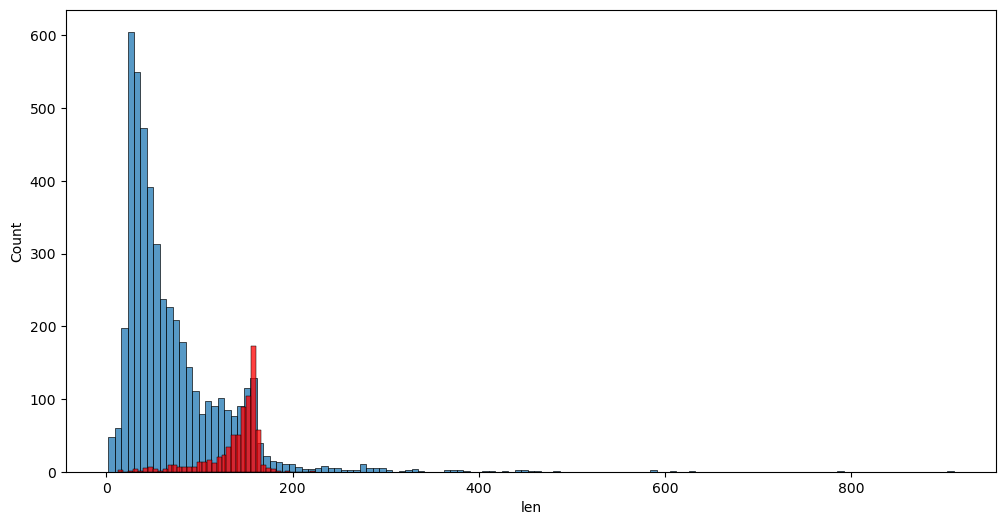

In [28]:
#graphical exploration
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['len']) #ham
sns.histplot(data[data['target'] == 1]['len'], color = 'red')#spam
plt.show()

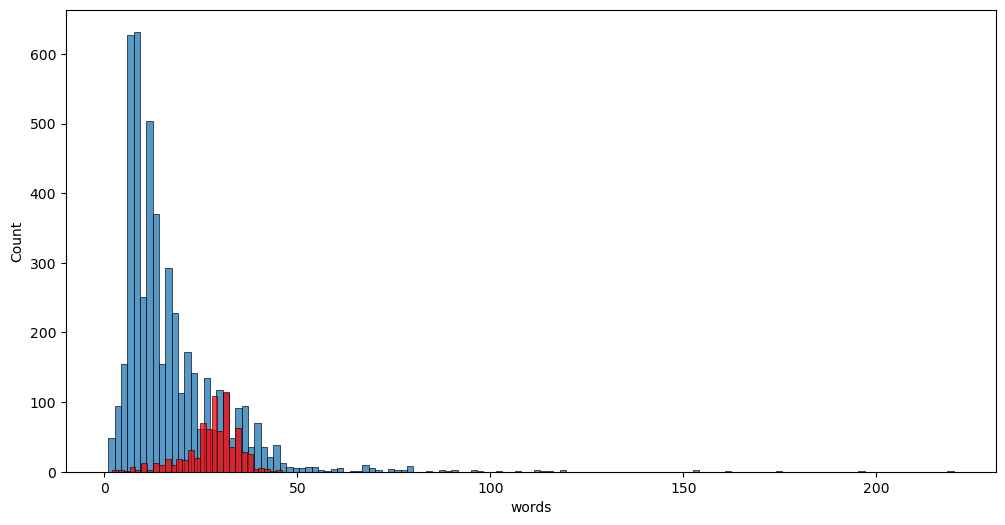

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['words']) #ham
sns.histplot(data[data['target'] == 1]['words'], color = 'red')#spam
plt.show()

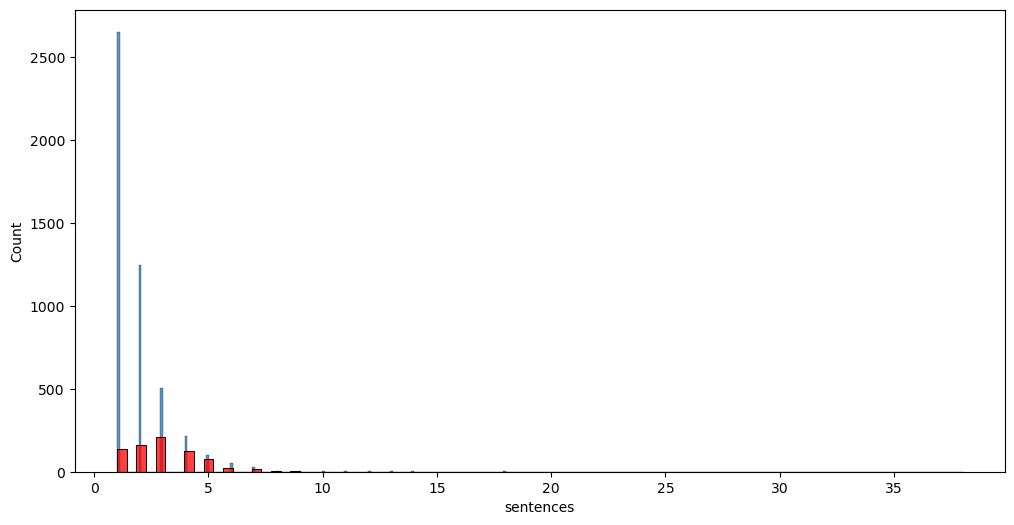

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['sentences']) #ham
sns.histplot(data[data['target'] == 1]['sentences'], color = 'red')#spam
plt.show()

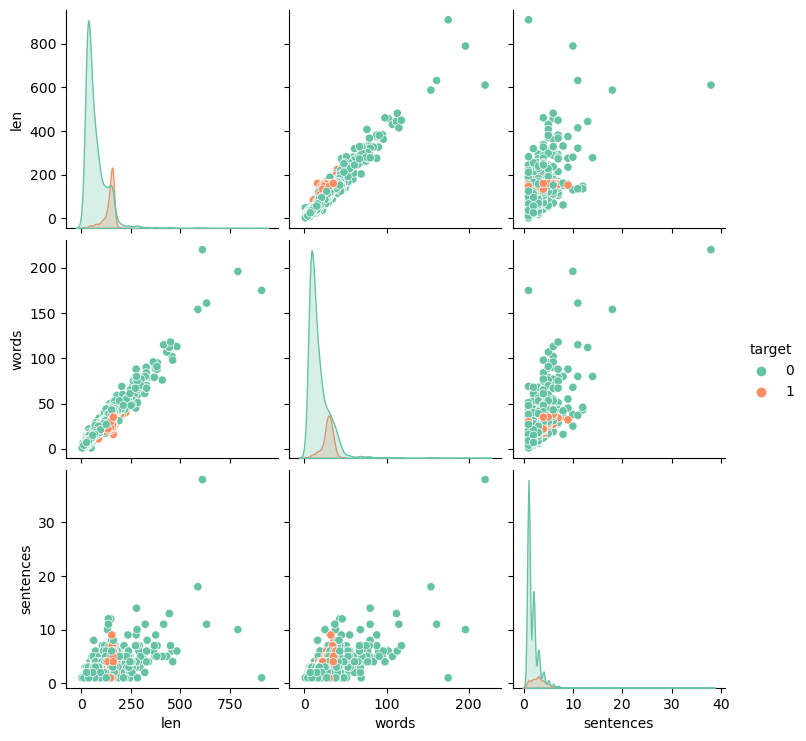

In [31]:
sns.pairplot(data, hue = 'target', palette='Set2')


<Axes: >

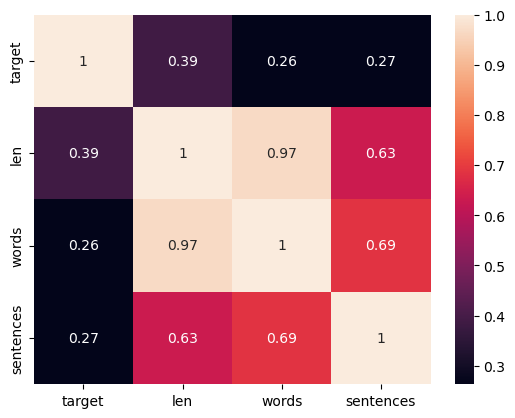

In [32]:
sns.heatmap(data[['target', 'len','words','sentences']].corr(), annot= True)

In [33]:
demo='HEllo?, i am happy to see you here'

In [34]:
demo.lower()#converting the text into lower case

'hello?, i am happy to see you here'

In [35]:
txt = nltk.word_tokenize(demo) #tokenizing the sentence into list of words
txt

['HEllo', '?', ',', 'i', 'am', 'happy', 'to', 'see', 'you', 'here']

In [36]:
#removing the special characters
x = []
for i in txt:
    if i.isalnum():
        x.append(i)
x

['HEllo', 'i', 'am', 'happy', 'to', 'see', 'you', 'here']

In [37]:
#removing stopwords and punctuations
txt = x[:] 
x.clear()
for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)
x

['HEllo', 'happy', 'see']

In [38]:
#by using stemming, we obtain the root words
txt = x[:]
x.clear()
for i in txt:
    ps = PorterStemmer()
    i = ps.stem(i)
    x.append(i)
x

['hello', 'happi', 'see']

In [39]:
#creating a function for the above requirements
def result_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text)  # tokenization
    
    # removing Special Characters
    demo = []
    for i in text:
        if i.isalnum():
            demo.append(i)
    text = demo[:]
    demo.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            demo.append(i)
    text = demo[:]
    demo.clear()
    
    #Stemming
    for i in text:
        ps = PorterStemmer()
        demo.append(ps.stem(i))
    return " ".join(demo)

In [40]:
result_text('HELLO ,,nice to meet you Stefan.how is ur day going')

'hello meet ur day go'

In [41]:
data['extracted_text']=data['text'].apply(result_text)

In [42]:
data.head()

,target,text,len,words,sentences,extracted_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
spam = []
for msg in data[data['target']==1]['extracted_text'].tolist():
    for word in msg.split():
        spam.append(word)
len(spam)

11490

In [44]:
from collections import Counter
data_spam = pd.DataFrame(Counter(spam).most_common(40), columns=['Word', 'Frequency'])
data_spam

,Word,Frequency
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


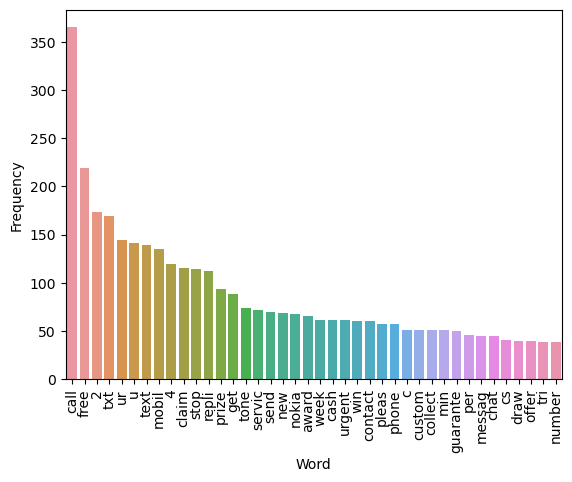

In [45]:
sns.barplot(x='Word', y='Frequency', data=data_spam)
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
ham = []
for msg in data[data['target']==0]['extracted_text'].tolist():
    for word in msg.split():
        ham.append(word)
len(ham)

38221

In [47]:
from collections import Counter
data_ham = pd.DataFrame(Counter(ham).most_common(40), columns=['Word', 'Frequency'])
data_ham

,Word,Frequency
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


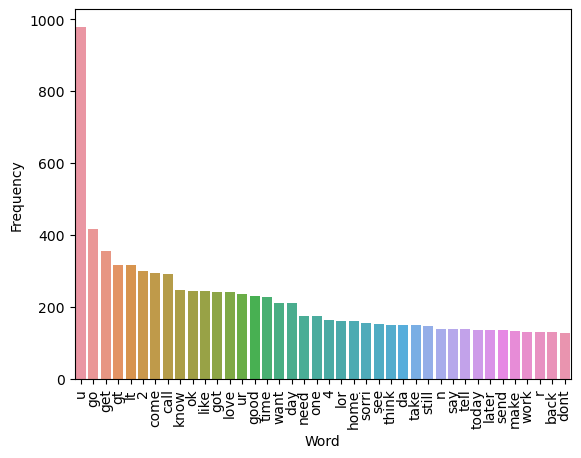

In [48]:
sns.barplot(x='Word', y='Frequency', data=data_ham)
plt.xticks(rotation = 'vertical')
plt.show()

In [49]:
#training the model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [50]:
x=cv.fit_transform(data['extracted_text']).toarray()

In [51]:
y=data['target'].values


In [54]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size =0.2, random_state = 2)

In [57]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score  
bnb = BernoulliNB()

In [58]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [59]:
y_pred=bnb.predict(X_test)

In [63]:
print(confusion_matrix(y_test,y_pred))

[[956   1]
 [ 33 125]]


In [65]:
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.9695067264573991


In [66]:
print("precision score:",precision_score(y_test,y_pred))

precision score: 0.9920634920634921


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [71]:
x1=tfidf.fit_transform(data['extracted_text']).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
X_train, X_test, y_train, y_test= train_test_split(x1, y, test_size =0.2, random_state = 2)

In [73]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [74]:
y_pred2=bnb.predict(X_test)

In [76]:
print(confusion_matrix(y_test,y_pred2))

[[956   1]
 [ 33 125]]


In [77]:
print('accuracy score:', accuracy_score(y_test,y_pred2))

accuracy score: 0.9695067264573991


In [78]:
print("precision score:", precision_score(y_test,y_pred2))

precision score: 0.9920634920634921


In [91]:
#testing the predictions 
data

,target,text,len,words,sentences,extracted_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [92]:
X = data['extracted_text']
y = data['target']
tfidf = TfidfVectorizer(max_features = 3000) 
X_tf = tfidf.fit_transform(data['extracted_text']).toarray() 
X_train_tf, X_test_tf, y_train_tf, y_test_tf= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [111]:
mnb.fit(X_train_tf,y_train_tf)

MultinomialNB()

In [114]:
def predict(X_pred):
    X_pred = result_text(X_pred)
    X_pred = [X_pred] 
    X_tf = tfidf.transform(X_pred).toarray()  
    predictions = bnb.predict(X_tf)
    if predictions == 1:
        print("The Message is Spam")
    else:
        print("The Message is not spam")

In [116]:
X_pred=input("enter the message")
predict(X_pred)

enter the messagei will be there in the after to attend the meeting
The Message is not spam
